In [2]:
from skimage import data,io,filters
from skimage import io
from skimage import color
from skimage.restoration import denoise_nl_means, estimate_sigma

import numpy as np
from numpy.fft import fft, fftfreq, ifft

from scipy import ndimage as nd
from scipy.fft import fft, ifft
from scipy import fftpack
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

from math import sqrt
from math import exp
from skimage.util import random_noise

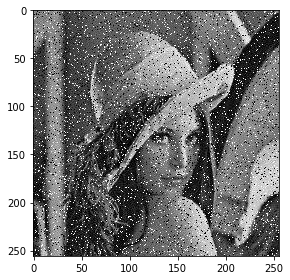

In [3]:
image=io.imread("lena.jpg")
io.imshow(image)


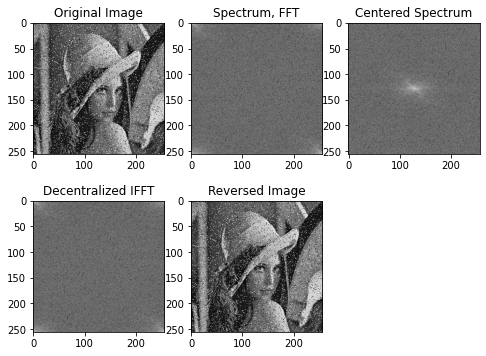

In [9]:
plt.figure(figsize=(8, 6), constrained_layout=False)

img_fft = np.fft.fft2(image)
img_fftshift = np.fft.fftshift(img_fft)
img_ifftshit = np.fft.ifftshift(img_fftshift)
img_ifft = np.fft.ifft2(img_ifftshit)


plt.subplot(231), plt.imshow(image, "gray"), plt.title("Original Image")
plt.subplot(232), plt.imshow(np.log(1+np.abs(img_fft)), "gray"), plt.title("Spectrum, FFT")
plt.subplot(233), plt.imshow(np.log(1+np.abs(img_fftshift)), "gray"), plt.title("Centered Spectrum")
plt.subplot(234), plt.imshow(np.log(1+np.abs(img_ifftshit)), "gray"), plt.title("Decentralized IFFT")
plt.subplot(235), plt.imshow(np.abs(img_ifft), "gray"), plt.title("Reversed Image")

plt.show()

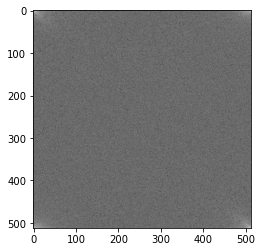

In [4]:
plt.imshow(np.log1p(np.abs(img_fft)),cmap="gray")

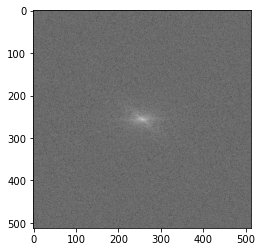

In [5]:
plt.imshow(np.log1p(np.abs(img_fftshift)),cmap="gray")

In [6]:
def low_pass(img):
    m,n=img.shape
    D0=50
    H=np.zeros((m,n),dtype=np.float32)
    for x in range(m):
        for y in range(n):
            d=sqrt((x-m/2)*(x-m/2)+(y-n/2)*(y-n/2))
            if(d<=D0):
                H[x,y]=1
            else:
                H[x,y]=0
    return H;  
def high_pass(img):
    m,n=img.shape
    D0=50
    H=np.zeros((m,n),dtype=np.float32)
    for x in range(m):
        for y in range(n):
            d=sqrt((x-m/2)*(x-m/2)+(y-n/2)*(y-n/2))
            if(d<=D0):
                H[x,y]=0
            else:
                H[x,y]=1
    return H;
def BUTTER(img):
    m,n=img.shape
    D0=30
    D1=60
    H=np.zeros((m,n),dtype=np.float32)
    for x in range(m):
        for y in range(n):
            d=sqrt((x-m/2)*(x-m/2)+(y-n/2)*(y-n/2))
            if(d>=D0 and d<=D1):
                H[x,y]=0
            else:
                H[x,y]=1
    return H;    

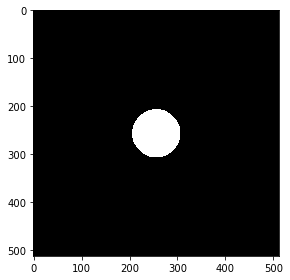

In [7]:
img_fftshift=low_pass(img_fftshift)
io.imshow(img_fftshift)

In [8]:
def Frequency_domain(image,filt):
    
    plt.figure(figsize=(8, 6), constrained_layout=False)

    img_fft = np.fft.fft2(image)
    img_fftshift = np.fft.fftshift(img_fft)
    if(filt=="L"):
        img_fftshift=img_fftshift*low_pass(img_fftshift)
    elif(filt=="H"):
        img_fftshift=img_fftshift*high_pass(img_fftshift)
    else:
        img_fftshift=img_fftshift*BUTTER(img_fftshift)
        
    img_ifftshit = np.fft.ifftshift(img_fftshift)
    img_ifft = np.fft.ifft2(img_ifftshit)


    plt.subplot(231), plt.imshow(image, "gray"), plt.title("Original Image")
    plt.subplot(232), plt.imshow(np.log(1+np.abs(img_fft)), "gray"), plt.title("Spectrum, FFT")
    plt.subplot(233), plt.imshow(np.log(1+np.abs(img_fftshift)), "gray"), plt.title("Centered Spectrum")
    plt.subplot(234), plt.imshow(np.log(1+np.abs(img_ifftshit)), "gray"), plt.title("Decentralized IFFT")
    plt.subplot(235), plt.imshow(np.abs(img_ifft), "gray"), plt.title("Reversed Image")

    plt.show()

In [9]:
# plt.figure(figsize=(8, 6), constrained_layout=False)

# img_fft = np.fft.fft2(image)
# img_fftshift = np.fft.fftshift(img_fft)
# img_fftshift=img_fftshift*high_pass(img_fftshift)
# img_ifftshit = np.fft.ifftshift(img_fftshift)
# img_ifft = np.fft.ifft2(img_ifftshit)


# plt.subplot(231), plt.imshow(image, "gray"), plt.title("Original Image")
# plt.subplot(232), plt.imshow(np.log(1+np.abs(img_fft)), "gray"), plt.title("Spectrum, FFT")
# plt.subplot(233), plt.imshow(np.log(1+np.abs(img_fftshift)), "gray"), plt.title("Centered Spectrum")
# plt.subplot(234), plt.imshow(np.log(1+np.abs(img_ifftshit)), "gray"), plt.title("Decentralized IFFT")
# plt.subplot(235), plt.imshow(np.abs(img_ifft), "gray"), plt.title("Reversed Image")

# plt.show()

In [10]:
# plt.figure(figsize=(8, 6), constrained_layout=False)

# img_fft = np.fft.fft2(image)
# img_fftshift = np.fft.fftshift(img_fft)
# img_fftshift=img_fftshift*BUTTER(img_fftshift)
# img_ifftshit = np.fft.ifftshift(img_fftshift)
# img_ifft = np.fft.ifft2(img_ifftshit)


# plt.subplot(231), plt.imshow(image, "gray"), plt.title("Original Image")
# plt.subplot(232), plt.imshow(np.log(1+np.abs(img_fft)), "gray"), plt.title("Spectrum, FFT")
# plt.subplot(233), plt.imshow(np.log(1+np.abs(img_fftshift)), "gray"), plt.title("Centered Spectrum")
# plt.subplot(234), plt.imshow(np.log(1+np.abs(img_ifftshit)), "gray"), plt.title("Decentralized IFFT")
# plt.subplot(235), plt.imshow(np.abs(img_ifft), "gray"), plt.title("Reversed Image")

# plt.show()

In [11]:
import statistics
def median_filtering(data, filter_size):
    temp = []
    
    indexer = filter_size // 2
    
    new_image = data.copy()
    
    nrow,ncol=data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            
            
            
            new_image[i,j]=statistics.median(temp)
            
            temp =[]
    
    return new_image.copy()



C:\ProgramData\Anaconda3\lib\statistics.py:435: RuntimeWarning: overflow encountered in ubyte_scalars
  return (data[i - 1] + data[i]) / 2


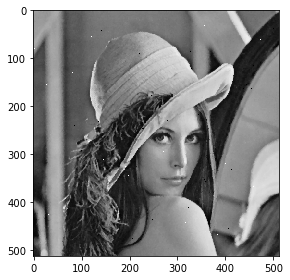

In [12]:
smooth_image=median_filtering(image,3)
io.imshow(smooth_image)

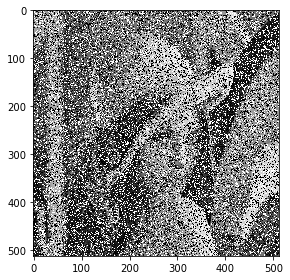

In [16]:
noise_img = random_noise(image, mode='s&p',amount=0.3)
io.imshow(noise_img)

 

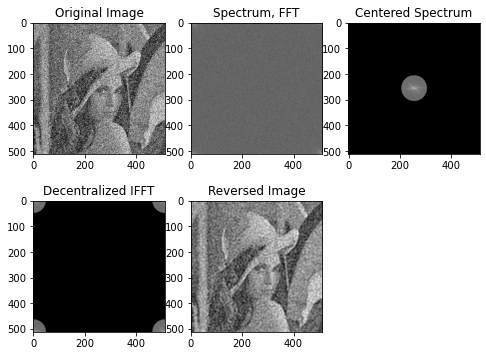

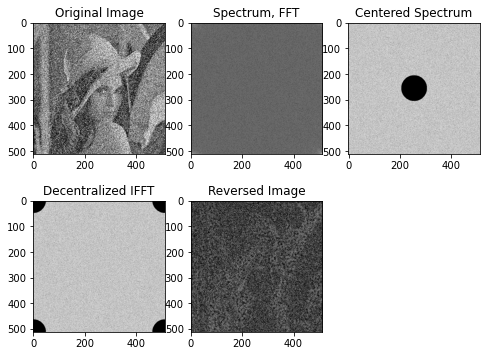

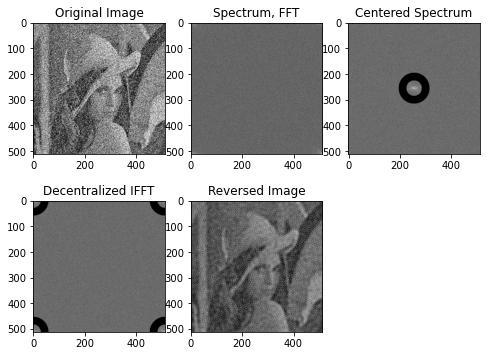

In [17]:
smooth_image=median_filtering(noise_img,3)

frequency_fitered_image=Frequency_domain(noise_img,"L")
frequency_fitered_image=Frequency_domain(noise_img,"H")
frequency_fitered_image=Frequency_domain(noise_img,"B")

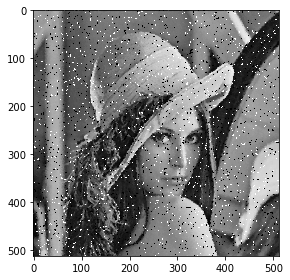

In [18]:
io.imshow(smooth_image)